In [15]:
import pandas as pd
base=pd.read_csv('census.csv')
previsores=base.iloc[:,0:14].values
classe=base.iloc[:,14].values
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_previsores=LabelEncoder()
for i in range(1,14):
    if i in [1,3,5,6,7,8,9,13]:
        previsores[:,i]=labelencoder_previsores.fit_transform(previsores[:,i])
labelencoder_classe=LabelEncoder()
classe=labelencoder_classe.fit_transform(classe)
#onehotencoder=OneHotEncoder(categorical_features=[1,3,5,6,7,8,9,13])
#previsores=onehotencoder.fit_transform(previsores).toarray()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores=scaler.fit_transform(previsores)
from sklearn.model_selection import train_test_split
previsores_train,previsores_teste,classe_train,classe_teste=train_test_split(previsores,classe,test_size=0.25,random_state=0)

/home/malco/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
x=[]
y=[]
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
for i in range(1,100):
    classificador=RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    classificador.fit(previsores_train,classe_train)
    previsoes=classificador.predict(previsores_teste)
    precisao=accuracy_score(classe_teste,previsoes)
    x.append(i)
    y.append(precisao)


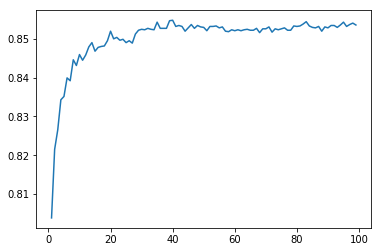

o valor maximo de acerto foi de: 0.854809
O numero de arvores é de: 39 


In [17]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()
max_accuracy=max(y)
n_random_forests=y.index(max_accuracy)
print("o valor maximo de acerto foi de: %f"%(max_accuracy))
print("O numero de arvores é de: %i "%(n_random_forests))

In [19]:
max(y)

0.8548089915243827